# Calculation of the Frequency of the Words in the Corpus

Raw frequency, % relative frequency, relative frequency per million were calculated for words in the **interpretive texts**. Consider that the interpretive text contains the integrations and abbreviation resolutions by modern editors. 

A CSV file was generated containing the counting of the frequency of each word sorted in descending order.

Using a word-level analysis and the interpretive texts permitted to compare the results with other corpora.

Calculating the frequency on the 'inscription' column permits to measure how many times the formula 'Manibus' is written for long or it is abbreviated (NEXT STEP).

In [1]:
import pandas as pd
from collections import Counter
from nltk.tokenize import sent_tokenize, word_tokenize
import matplotlib.pyplot as plt

In [2]:
##open the dataset of funerary inscriptions (172,958 rows)
Inscriptions = pd.read_csv("/Users/u0154817/OneDrive - KU Leuven/Documents/ICLL Prague June 2023/Output/Tituli_Sepulcrales_new.csv")

In [3]:
len(Inscriptions)

172958

In [4]:
##create a list of all the tokens in the interpretive texts
list_of_words = []

for i,inscription in enumerate(Inscriptions['inscription_interpretive_cleaning']):
    inscription = str(inscription)
    tokenized_inscription = word_tokenize(inscription) ##tokenize the inscription with NLTK
    for word in tokenized_inscription:
        word = word.lower() ##lower the word
        list_of_words.append(word)

In [5]:
##word count in the interpretive texts (2,007,668)
len(list_of_words)

2007668

In [6]:
counter_words = Counter(list_of_words) ##calculate raw frequency

##number of unique words in interpretive texts (115,697)
len(counter_words)

115697

In [7]:
##get the 20 most frequent words in interpretive texts
most_frequent_words = counter_words.most_common(20)

In [8]:
##most frequent words ranked in terms of raw frequency
most_frequent_words

[('vixit', 67831),
 ('manibus', 65975),
 ('dis', 65783),
 ('et', 55056),
 ('annos', 50095),
 ('in', 31591),
 ('hic', 27439),
 ('fecit', 26399),
 ('bene', 22934),
 ('est', 22740),
 ('sacrum', 21157),
 ('merenti', 20592),
 ('annis', 18841),
 ('coniugi', 15627),
 ('pace', 14512),
 ('situs', 13814),
 ('sibi', 13478),
 ('filio', 12973),
 ('qui', 12803),
 ('que', 12294)]

In [9]:
##raw frequency descending order
raw_frequencies = counter_words.most_common(115697)
frequencies = pd.DataFrame(raw_frequencies, columns=['word', 'raw_frequency'])

In [10]:
##calculate the relative frequency of the words

relative_frequencies = []
percent_relative_frequencies = []
relat_frequencies_per_million = []

for i,raw_frequency in enumerate(frequencies['raw_frequency']):
    relative_frequency = (raw_frequency / len(list_of_words))
    relative_frequencies.append(relative_frequency)
    perc_relative_frequency = relative_frequency * 100
    percent_relative_frequencies.append(perc_relative_frequency)
    relat_frequency_per_million = relative_frequency * 1000000
    relat_frequencies_per_million.append(relat_frequency_per_million)
    
frequencies['relative_frequency'] = relative_frequencies
frequencies['percent_relative_frequency'] = percent_relative_frequencies
frequencies['relat_frequency_per_million'] = relat_frequencies_per_million
frequencies.head(10)

,word,raw_frequency,relative_frequency,percent_relative_frequency,relat_frequency_per_million
0,vixit,67831,0.033786,3.378596,33785.964612
1,manibus,65975,0.032862,3.286151,32861.508975
2,dis,65783,0.032766,3.276588,32765.875633
3,et,55056,0.027423,2.742286,27422.860752
4,annos,50095,0.024952,2.495183,24951.834666
5,in,31591,0.015735,1.573517,15735.171353
6,hic,27439,0.013667,1.366710,13667.100337
7,fecit,26399,0.013149,1.314909,13149.086403
8,bene,22934,0.011423,1.142320,11423.203438
9,est,22740,0.011327,1.132657,11326.573916


In [ ]:
frequencies.to_csv('1.5.Frequency_Count.csv', index=False)

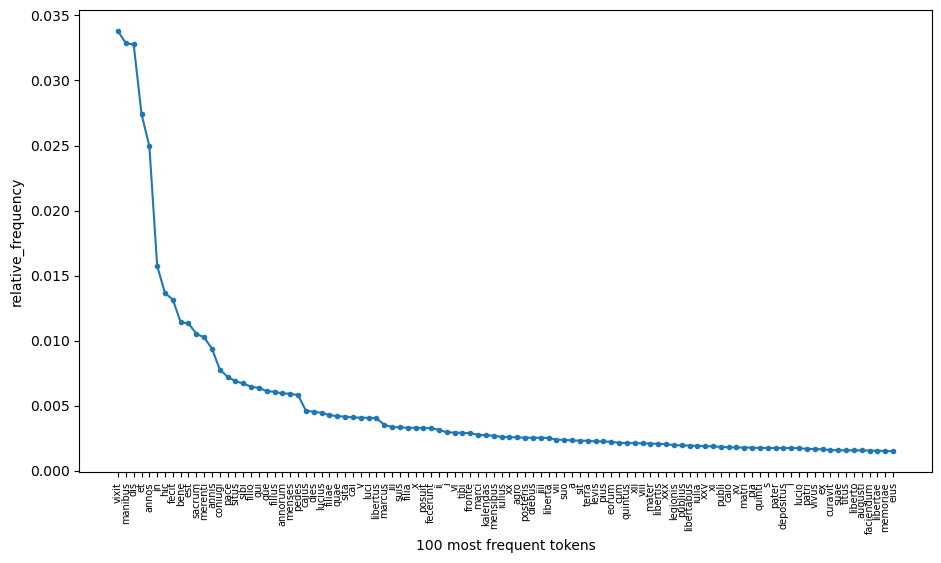

In [11]:
##create a plot
subset = frequencies.head(100)

plt.figure(figsize=(11, 6))
plt.plot(subset['word'], subset['relative_frequency'], marker='.', linestyle='-')
plt.ylabel('relative_frequency')
plt.xlabel('100 most frequent tokens')
plt.xticks(rotation=90, fontsize=7)

plt.show()